In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#read the dataset
df = pd.read_csv("height-weight.csv")

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

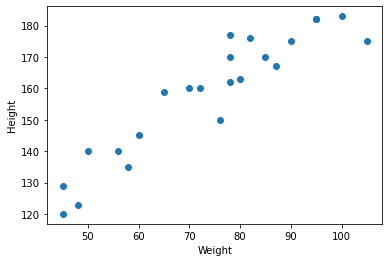

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [7]:
## divide our dataset into independent and dependent vairable

In [49]:
X = df[['Weight']] #independent
Y = df['Height'] # dependent

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
#Train test split
X_train,X_test, Y_train,Y_test =  train_test_split(X,Y,test_size = 0.20,random_state = 42)

In [52]:
X.shape

(23, 1)

In [53]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [54]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [55]:
## Standardize the dataset train independent data
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
scaler.fit_transform(X_train)

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [58]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [59]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

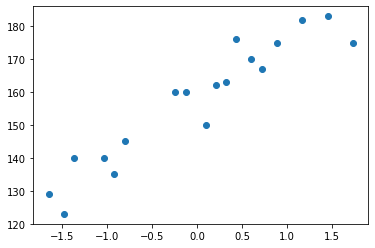

In [60]:
plt.scatter(X_train,Y_train)

In [61]:
#train the simple Linear Regression model
from sklearn.linear_model import LinearRegression

In [62]:
regressor = LinearRegression()

In [63]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [64]:
print("the slope or coefficient of weight is ", regressor.coef_)
print('intercept:', regressor.intercept_)

the slope or coefficient of weight is  [17.03440872]
intercept: 157.5


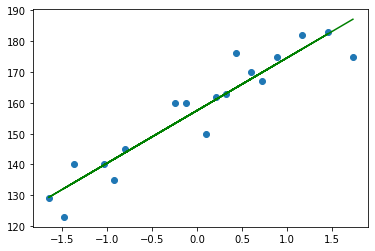

In [65]:
plt.scatter(X_train,Y_train)
plt.plot(X_train, regressor.predict(X_train),'g')

prediction of train data
1. predicted height output = intercept + coef_(weights)
2. y_pred_train = 157.5 +1 17.03(X_train)

prediction of test data
1. predicted height output = intercept + coef_(weights)
2 y_pred_test =157.5 + 17.03(X_test)

In [66]:
y_pred_test = regressor.predict (X_test)

In [67]:
y_pred_test, Y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

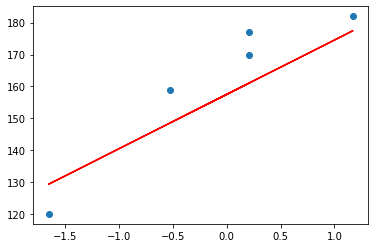

In [68]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

#performance metrics

#MSE, MAE, RMSE
##R square and adjusted R square

In [72]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [75]:
mse = mean_squared_error(Y_test,y_pred_test)
mae = mean_absolute_error(Y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [76]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred_test)

In [77]:
score

0.7769869860423441

In [ ]:
#adjusted R square

Adjusted r square
Adjusted R2 = 1-[(1-R2)* (n-1)/]

In [84]:
#display adjusted R squared 
1- (1-score)* (len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7026493147231254

In [85]:
regressor

LinearRegression()

In [86]:
# new data point weight is 80

In [89]:
scaled_weight = scaler.transform([[80]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [90]:
scaled_weight

array([[0.32350772]])

In [91]:
regressor.predict([scaled_weight[0]])

array([163.01076266])

In [92]:
print(regressor.predict([scaled_weight[0]]))

[163.01076266]


In [93]:
scaled_weight[0]

array([0.32350772])

In [95]:
print("the height prediction for weight 80 kg is :", regressor.predict([scaled_weight[0]]))

the height prediction for weight 80 kg is : [163.01076266]


In [97]:
## residuals 
residuals = Y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

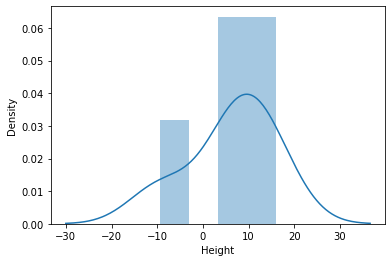

In [100]:
#plot this residuals
import seaborn as sns
sns.distplot(residuals, kde = True)

In [101]:
#scatter plot with respect ot prediction and residuals
# uniform distribution

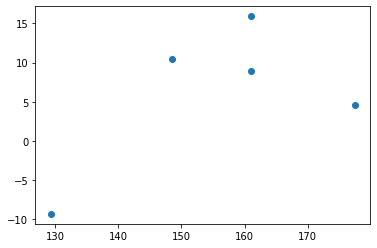

In [102]:
plt.scatter(y_pred_test, residuals)